In [5]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import sys
from scipy.interpolate import interp1d
sys.path.append('../../py/')

from cosmoSim import cosmoSim

In [6]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

ALPHA=1
FIGSIZE=[24,12]
DPI=300

snap_no = 3

In [7]:
outpath = '../../plots/plots_L3N256_variation/'

try:
    os.mkdir(outpath)
except:
    print(f'{outpath} already exists!')

CDM_search = '../../data_prods/run_CDM_L3N256_DM_dir*'
tcDM_search = '../../data_prods/run_2cDM_L3N256_DM_power00_sigma1_dir*'

CDM_runs = [ os.path.basename(x) for x in glob.glob(CDM_search) ]
CDM_runs.remove('run_CDM_L3N256_DM_dir_0')
tcDM_runs = [ os.path.basename(x) for x in glob.glob(tcDM_search) ]

runs = CDM_runs + tcDM_runs

../../plots/plots_L3N256_variation/ already exists!


In [8]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l    

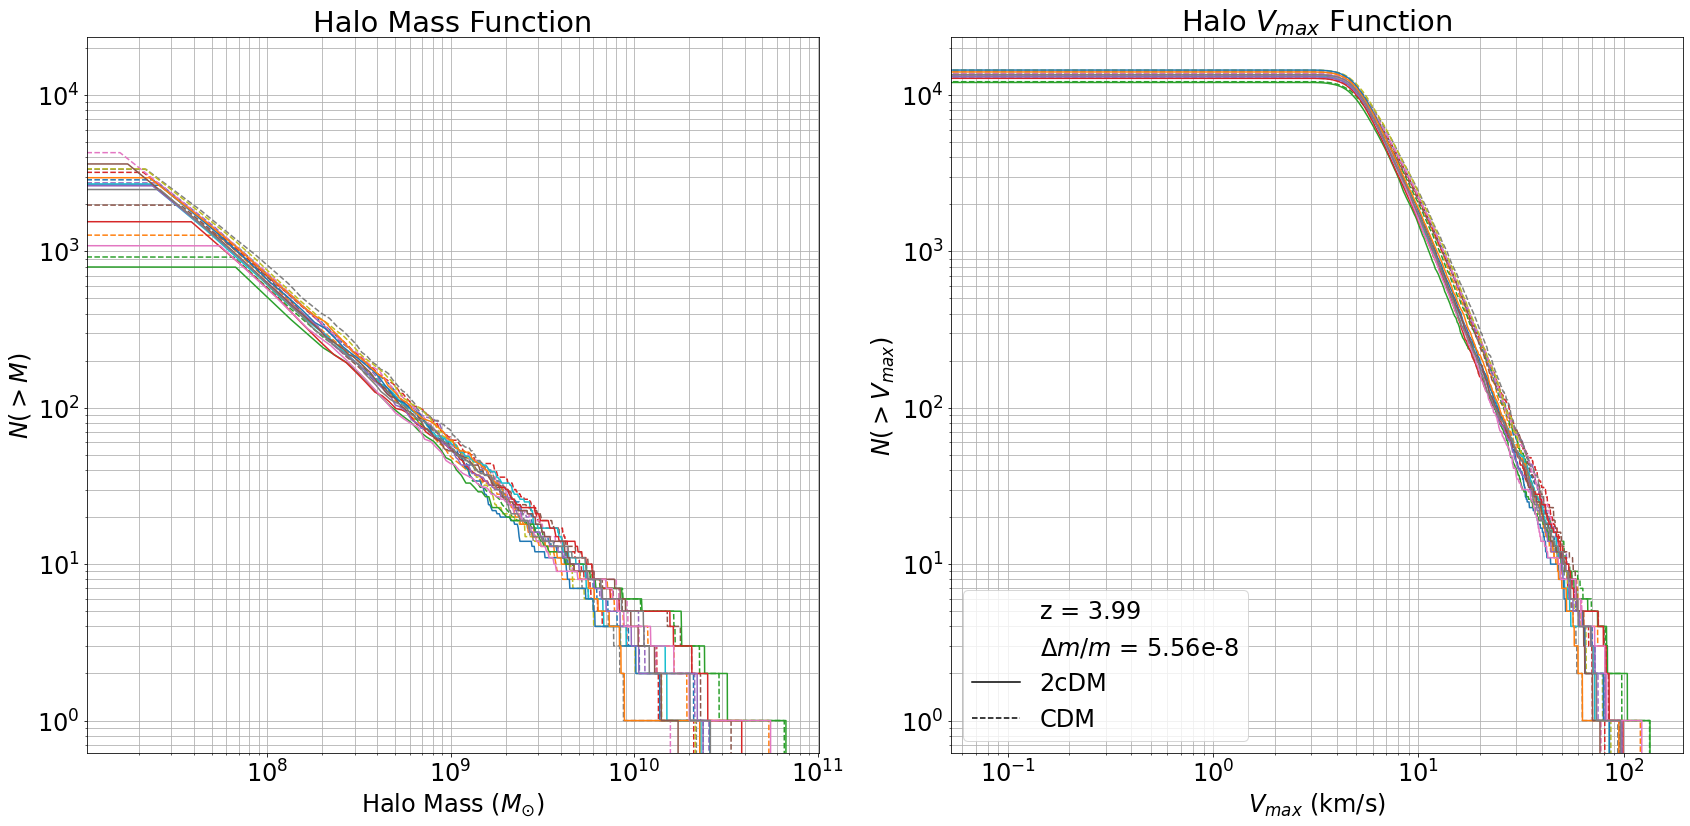

In [9]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    mbins, m = run.load_mass_profile(run.redshifts[snap_no])
    vbins, v = run.load_vel_profile(run.redshifts[snap_no])
    if run.dm_type == '2cDM':
        ax[0].plot(mbins, m, alpha=ALPHA)
        ax[1].plot(vbins, v, alpha=ALPHA)
    else:
        ax[0].plot(mbins, m, '--', alpha=ALPHA)
        ax[1].plot(vbins, v, '--', alpha=ALPHA)
ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)
ax[1].plot([],[], '-', label='2cDM', color='k')
ax[1].plot([],[], '--', label='CDM', color='k')

ax[1].set_xlabel("$V_{max}$ (km/s)")
ax[1].set_ylabel("$N\\left(>V_{max}\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_yscale("log")
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")


fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_both_profiles.png', dpi=DPI)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


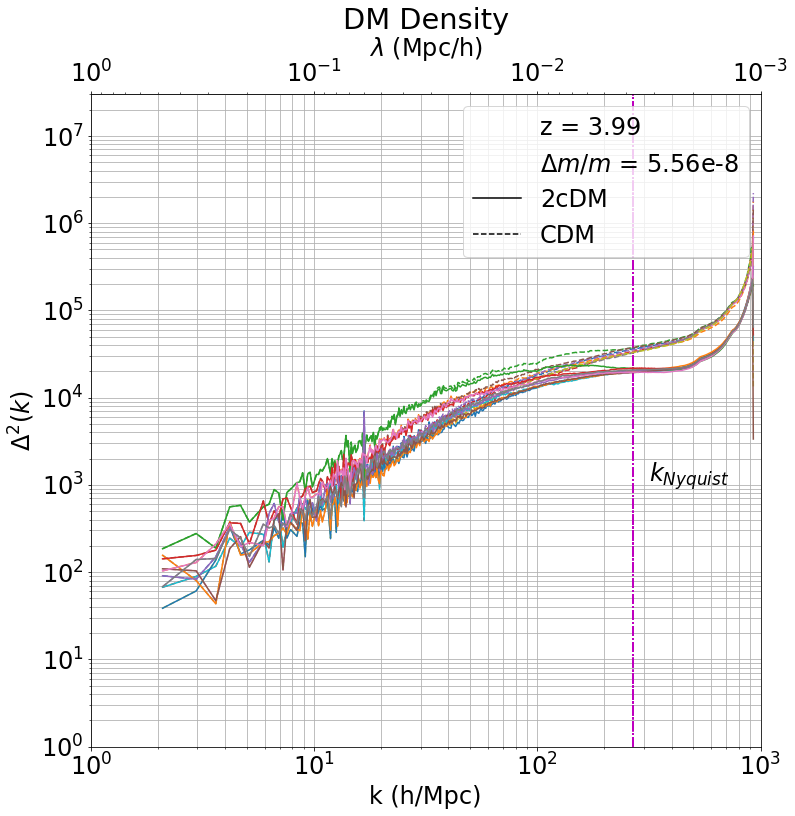

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])

    if run.dm_type == '2cDM':
        ax.plot(bins, dk, alpha=ALPHA)
    else:
        ax.plot(bins, dk, '--', alpha=ALPHA)

    ax.vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashdot')


ax.text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')


ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(10**0, 10**7 + 2*10**7)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)
ax.plot([],[], '-', label='2cDM', color='k')
ax.plot([],[], '--', label='CDM', color='k')

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_Spectra_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

run_CDM_L3N256_DM_dir_5
run_CDM_L3N256_DM_dir_4
run_CDM_L3N256_DM_dir_6
run_CDM_L3N256_DM_dir_7
run_CDM_L3N256_DM_dir_2
run_CDM_L3N256_DM_dir_9
run_CDM_L3N256_DM_dir_1
run_CDM_L3N256_DM_dir_8
run_CDM_L3N256_DM_dir_3


/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


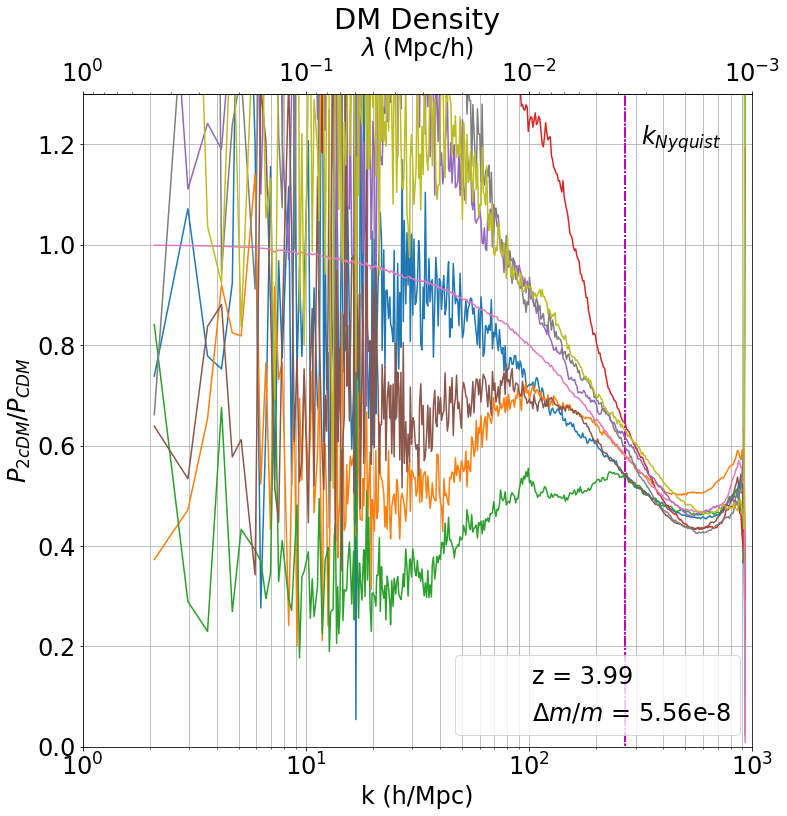

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])

for i, run_n in enumerate(tcDM_runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])
    
    cdm_run = cosmoSim(CDM_runs[i])
    cbins, cpk, cdk, ck_ny = cdm_run.load_power_spectra(run.redshifts[snap_no])
    ax.plot(bins, pk/cpk, alpha=ALPHA)

    ax.vlines(k_ny, -3, 3, colors='m', linestyles='dashdot')



ax.text(k_ny + 0.5*10**2, 1.2, '$k_{Nyquist}$')


ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(0, 1.3)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_ratio_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

In [12]:
def create_averages_inner(domain, range, inf, sup):
    new_inf = inf
    new_sup = sup
    interpf = interp1d(domain, range)
    if np.amin(domain) > inf:
        new_inf = np.amin(domain)
    if np.amax(domain) < sup:
        new_sup = np.amax(domain)

    return interpf, new_inf, new_sup
    
def get_samples(domain, interpf_list):
    return [ interpf(domain) for interpf in interpf_list ]


def create_averages(run_list):
    
    run = cosmoSim(run_list[0])
    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])
    mbins, m = run.load_mass_profile(run.redshifts[snap_no])
    vbins, v = run.load_vel_profile(run.redshifts[snap_no])

    sup_k = np.amax(bins)
    inf_k = np.amin(bins)
    sup_m = np.amax(mbins)
    inf_m = np.amin(mbins)
    sup_v = np.amax(vbins)
    inf_v = np.amin(vbins)

    dk_interps = []
    mf_interps = []
    vf_interps = []

    for run_n in run_list:
        run = cosmoSim(run_n)
        bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])
        mbins, m = run.load_mass_profile(run.redshifts[snap_no])
        vbins, v = run.load_vel_profile(run.redshifts[snap_no])

        kinterp, inf_k, sup_k = create_averages_inner(bins, dk, inf_k, sup_k)
        dk_interps.append(kinterp)

        minterp, inf_m, sup_m = create_averages_inner(mbins, m, inf_m, sup_m)
        mf_interps.append(minterp)

        vinterp, inf_v, sup_v = create_averages_inner(vbins, v, inf_v, sup_v)
        vf_interps.append(vinterp)

    kbins = np.linspace(inf_k, sup_k, num=10000)
    mbins = np.linspace(inf_m, sup_m, num=10000)
    vbins = np.linspace(inf_v, sup_v, num=10000)

    dk_samps = get_samples(kbins, dk_interps)
    mf_samps = get_samples(mbins, mf_interps)
    vf_samps = get_samples(vbins, vf_interps)

    dk_avg = np.mean(dk_samps, axis=0)
    mf_avg = np.mean(mf_samps, axis=0)
    vf_avg = np.mean(vf_samps, axis=0)

    return kbins, dk_avg, mbins, mf_avg, vbins, vf_avg

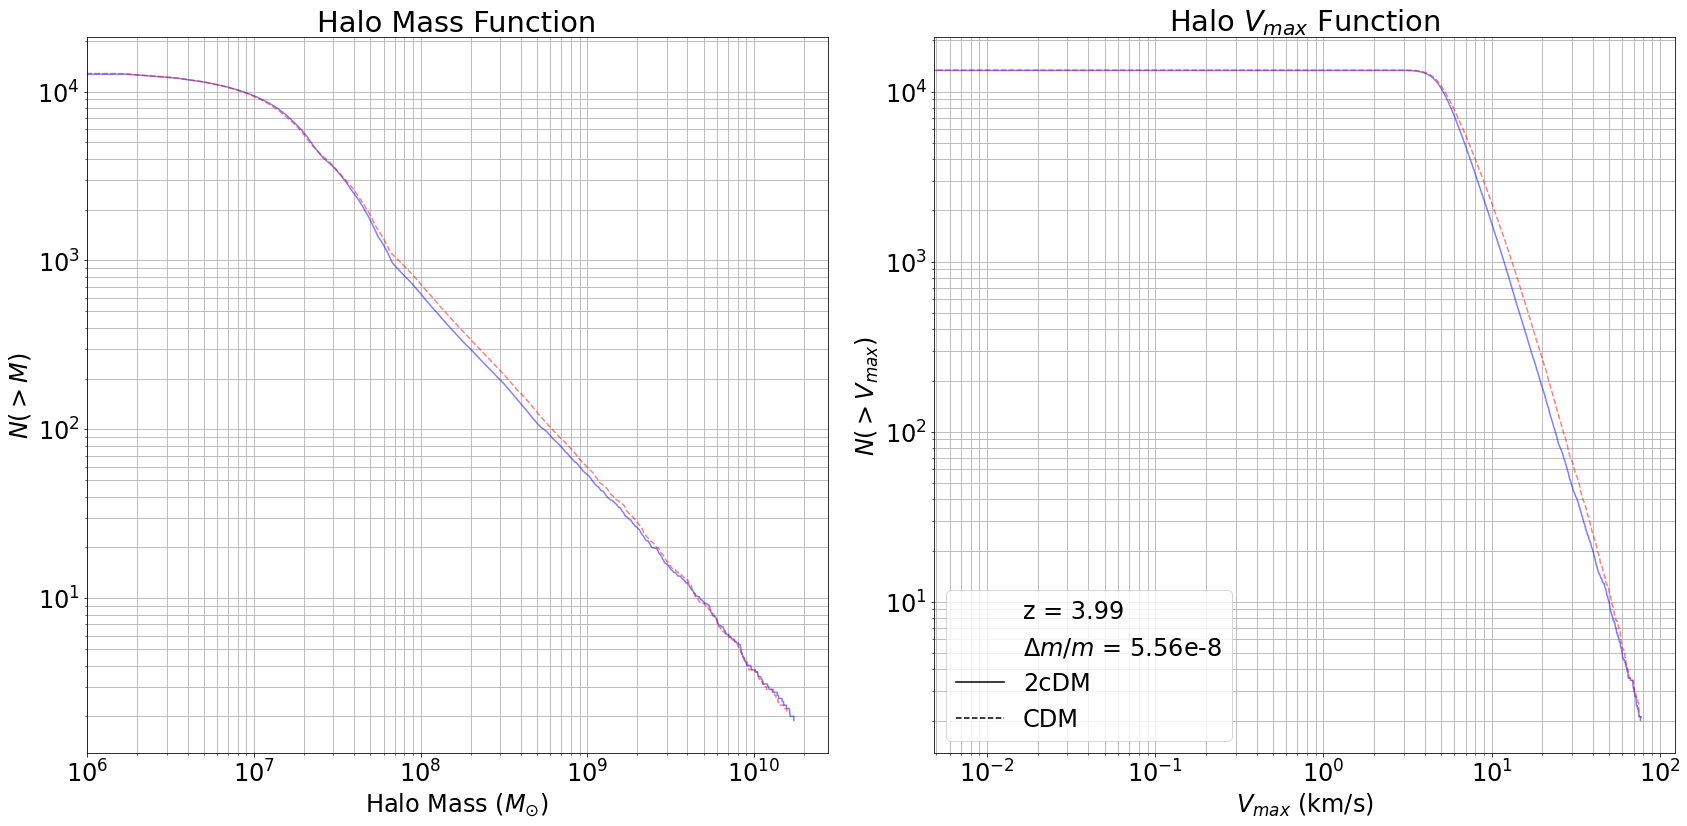

In [13]:
kbins, dk_avg, mbins, mf_avg, vbins, vf_avg = create_averages(tcDM_runs)


fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

ax[0].plot(mbins, mf_avg, color='b', alpha=0.5)
ax[1].plot(vbins, vf_avg, color='b', alpha=0.5)

kbins, dk_avg, mbins, mf_avg, vbins, vf_avg = create_averages(CDM_runs)

ax[0].plot(mbins, mf_avg, '--', color='r', alpha=0.5)
ax[1].plot(vbins, vf_avg, '--', color='r', alpha=0.5)


ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)
ax[1].plot([],[], '-', label='2cDM', color='k')
ax[1].plot([],[], '--', label='CDM', color='k')

ax[1].set_xlabel("$V_{max}$ (km/s)")
ax[1].set_ylabel("$N\\left(>V_{max}\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_yscale("log")
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")


fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_both_avg_profiles.png', dpi=DPI)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


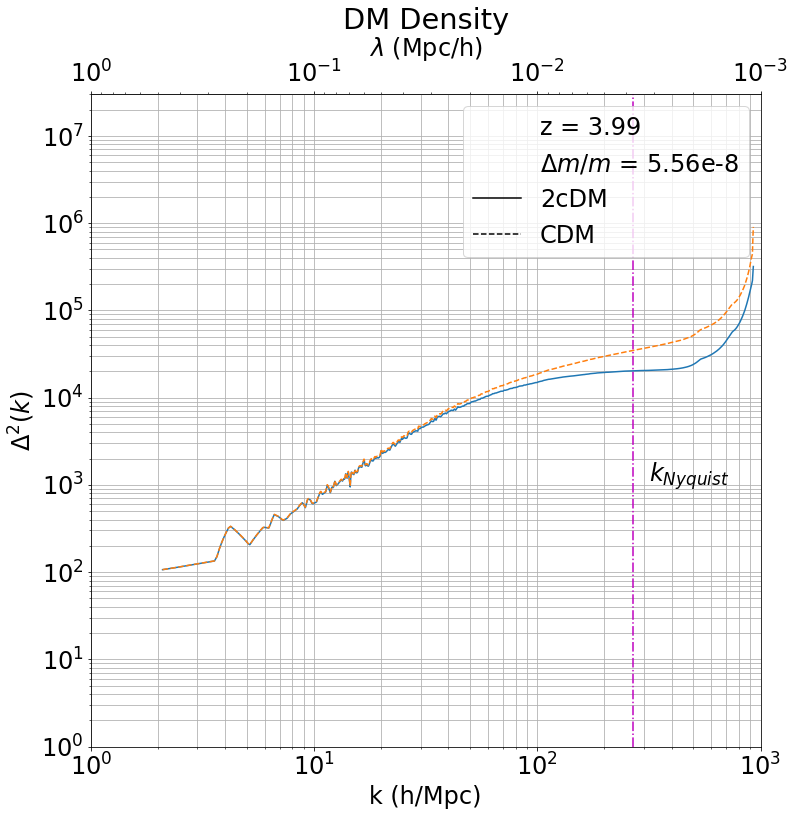

In [14]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])
kbins, dk_avg, mbins, mf_avg, vbins, vf_avg = create_averages(tcDM_runs)
ax.plot(kbins, dk_avg, alpha=ALPHA)
kbins, dk_avg, mbins, mf_avg, vbins, vf_avg = create_averages(CDM_runs)
ax.plot(kbins, dk_avg, '--', alpha=ALPHA)

ax.vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashdot')

ax.text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')


ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(10**0, 10**7 + 2*10**7)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)
ax.plot([],[], '-', label='2cDM', color='k')
ax.plot([],[], '--', label='CDM', color='k')

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_avg_Spectra_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


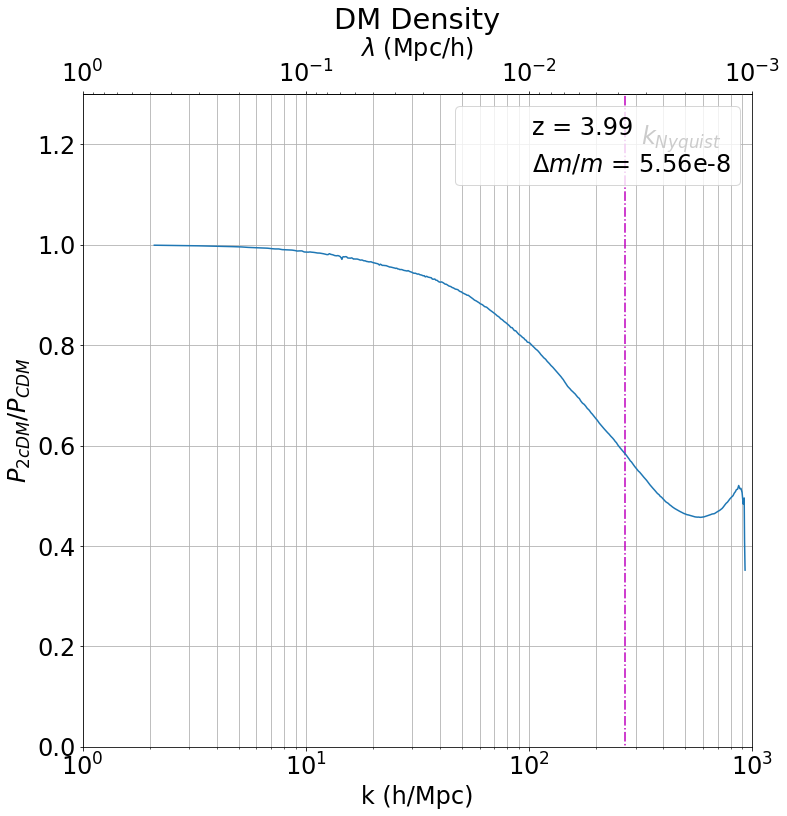

In [15]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])

kbins, tdk_avg, mbins, mf_avg, vbins, vf_avg = create_averages(tcDM_runs)
kbins, cdk_avg, mbins, mf_avg, vbins, vf_avg = create_averages(CDM_runs)
ax.plot(kbins, tdk_avg/cdk_avg, alpha=ALPHA)

ax.vlines(k_ny, -3, 3, colors='m', linestyles='dashdot')

ax.text(k_ny + 0.5*10**2, 1.2, '$k_{Nyquist}$')

ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(0, 1.3)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_avg_ratio_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()